In [1]:
#Importing necessary libraries

import random as rn
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Defining the path to the data directories
#One path will be for the csv which contains information about the classification and the other is folder with the images

df = pd.read_csv('Galaxy_Classes.csv')
pic_all = "C:/python_lessons/January_Project/images/"

In [3]:
df.head(10)

,objid,sample,asset_id,gz2_class,category
0,5.880000e+17,original,3,Sc?l,Spiral
1,5.880000e+17,original,4,Sc?l,Spiral
2,5.880000e+17,original,5,Er,Elliptical
3,5.880000e+17,original,6,Sc1t,Spiral
4,5.880000e+17,original,7,Sc1t,Spiral
5,5.880000e+17,original,8,Sc1t,Spiral
6,5.880000e+17,original,9,Sc1t,Spiral
7,5.880000e+17,original,11,Sb,Spiral
8,5.880000e+17,original,12,Sb,Spiral
9,5.880000e+17,original,13,Ec,Elliptical


In [4]:
pd.set_option("display.max_rows", None)

df['gz2_class'].value_counts()

Ei          49259
Er          44637
Sc?t        14563
Ser         14407
Ec           9154
Sb           7746
SBc2m        6664
Sb?t         6521
Sc           5392
SBc?t        4419
SBb2m        4257
Sen          4046
SBc2t        3718
Sc2m         3526
Sc?m         3407
Sc2t         3329
SBb?t        2899
Sc3t         2578
SBb2t        2455
SBb          2389
Er(o)        2165
SBc2l        2054
Sb?m         1709
Sb2m         1677
Sb2t         1666
SBc          1598
Sc3m         1577
Sb?t(r)      1557
Sb(o)        1437
Ei(o)        1379
Sb(r)        1317
Sc+t         1299
SBb2l        1265
SBc?m        1226
SBb2m(r)     1218
Er(m)        1210
Sb(m)        1164
SBc3t        1132
Ei(m)        1124
SBb2t(r)     1020
SBc3m         984
Sc2l          982
Sc?t(r)       971
SBb?m         906
Sc4t          789
SBb?t(r)      750
Sb2l          701
A             683
Sb3t          660
Sc(o)         654
Ei(r)         639
Er(r)         636
Sc1t          562
Sb+t          538
Sb2t(r)       517
SBc2m(r)  

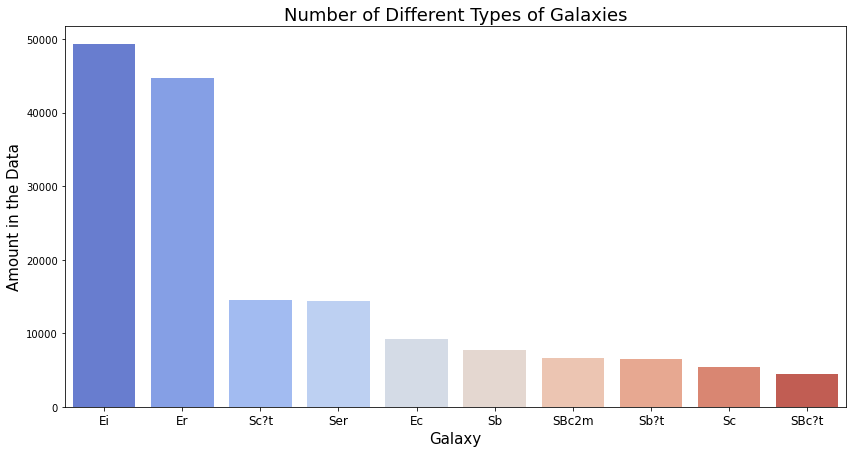

In [7]:
plt.figure(figsize=(14,7)) #Making the graph bigger to see all the years

count_plot = sns.countplot(x="gz2_class", data=df, palette="coolwarm",
              order=df.gz2_class.value_counts().iloc[:10].index) #Making the plot and defining it

count_plot.set_xticklabels(count_plot.get_xticklabels(), fontsize=12) #Changing the x labels to see them better

#Adding labels:
count_plot.set_title('Number of Different Types of Galaxies', fontsize=18)
count_plot.set_xlabel('Galaxy', fontsize=15)
count_plot.set_ylabel('Amount in the Data', fontsize=15)
#plt.tight_layout() #So that can see the labels. Because of the figure size the titles otherwise go out of view.
plt.show()

In [ ]:
#g = df.groupby('gz2_class')

#g.filter(lambda x: len(x) > 1)

In [5]:
#df.groupby('gz2_class').aggregate(np.count_nonzero)

,objid,sample,asset_id,category
gz2_class,,,,
A,683,683,683,683
Ec,9154,9154,9154,9154
Ec(d),18,18,18,18
Ec(i),59,59,59,59
Ec(l),15,15,15,15
Ec(m),63,63,63,63
Ec(o),114,114,114,114
Ec(r),51,51,51,51
Ec(u),5,5,5,5


In [5]:
#Defining a function with the categories which are in the top in terms the amount
def categorise(row):  
    x = row['gz2_class']
    if 'Er' in x:
        return 'Round_elliptical'
    elif 'Ec' in x:
        return 'Cigar_elliptical'
    elif 'Sc?t' in x:
        return 'Tight_spiral'
    else:
        return 'Unknown'

In [4]:
df.pop('category')
df

,objid,sample,asset_id,gz2_class
0,5.880000e+17,original,3,Sc?l
1,5.880000e+17,original,4,Sc?l
2,5.880000e+17,original,5,Er
3,5.880000e+17,original,6,Sc1t
4,5.880000e+17,original,7,Sc1t
...,...,...,...,...
267745,5.880000e+17,stripe82,295294,SBc4m
267746,5.880000e+17,stripe82,295295,Er
267747,5.880000e+17,stripe82,295296,Er
267748,5.880000e+17,stripe82,295304,Sc?l


In [6]:
df['category'] = df.apply(lambda row: categorise(row), axis=1)
df

,objid,sample,asset_id,gz2_class,category
0,5.880000e+17,original,3,Sc?l,Unknown
1,5.880000e+17,original,4,Sc?l,Unknown
2,5.880000e+17,original,5,Er,Round_elliptical
3,5.880000e+17,original,6,Sc1t,Unknown
4,5.880000e+17,original,7,Sc1t,Unknown
...,...,...,...,...,...
267745,5.880000e+17,stripe82,295294,SBc4m,Unknown
267746,5.880000e+17,stripe82,295295,Er,Round_elliptical
267747,5.880000e+17,stripe82,295296,Er,Round_elliptical
267748,5.880000e+17,stripe82,295304,Sc?l,Unknown


In [7]:
df['category'].value_counts()

Unknown             192468
Round_elliptical     49196
Tight_spiral         16607
Cigar_elliptical      9479
Name: category, dtype: int64

In [8]:
df.loc[df['category']=='Unknown']['gz2_class'].value_counts()

A    683
Name: gz2_class, dtype: int64

In [8]:
df.drop(df[df['category'] == 'Unknown'].index, inplace = True)

In [9]:
#Making a copy of the column being encoded
df['category_encoded'] = df['category']

In [10]:
df.head()

,objid,sample,asset_id,gz2_class,category,category_encoded
2,5.880000e+17,original,5,Er,Round_elliptical,Round_elliptical
9,5.880000e+17,original,13,Ec,Cigar_elliptical,Cigar_elliptical
12,5.880000e+17,original,16,Er,Round_elliptical,Round_elliptical
13,5.880000e+17,original,17,Er,Round_elliptical,Round_elliptical
18,5.880000e+17,original,22,Er,Round_elliptical,Round_elliptical


In [11]:
#Label encoding the category (target) feature in the data frame

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category_encoded'])

In [12]:
df.head(20)

,objid,sample,asset_id,gz2_class,category,category_encoded
2,5.880000e+17,original,5,Er,Round_elliptical,1
9,5.880000e+17,original,13,Ec,Cigar_elliptical,0
12,5.880000e+17,original,16,Er,Round_elliptical,1
13,5.880000e+17,original,17,Er,Round_elliptical,1
18,5.880000e+17,original,22,Er,Round_elliptical,1
28,5.880000e+17,original,32,Er,Round_elliptical,1
29,5.880000e+17,original,33,Er,Round_elliptical,1
40,5.880000e+17,original,44,Sc?t,Tight_spiral,2
41,5.880000e+17,original,45,Sc?t,Tight_spiral,2
42,5.880000e+17,original,46,Sc?t,Tight_spiral,2


In [14]:
Cigar_elliptical = df[df.category_encoded == 0]
Round_elliptical = df[df.category_encoded == 1]
Tight_spiral = df[df.category_encoded ==2]

In [15]:
categories = ['Cigar_elliptical', 'Round_elliptical', 'Tight_spiral']
categories_dfs = [Cigar_elliptical, Round_elliptical, Tight_spiral]

In [16]:
df.category_encoded.value_counts()

1    49196
2    16607
0     9479
Name: category_encoded, dtype: int64

In [17]:
#Saving a file

df.to_csv("Galaxy_ErEcSct.csv", index=False)

In [17]:
df_list = []
for i in categories_dfs:
    df_list.append(i.sample(n=500, random_state=101))


df_balanced = pd.concat(df_list,axis=0)

In [18]:
#Shuffling the data and resetting the index

df_processed = df_balanced.sample(frac=1).reset_index(drop=True)

df_processed

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,original,47128,Ei,E,0
1,5.880000e+17,extra,263990,Ser,Se,3
2,5.880000e+17,original,22198,Sb?t,S_N,1
3,5.880000e+17,original,124432,Sc4m,S_arms,2
4,5.880000e+17,original,116657,Ser,Se,3
...,...,...,...,...,...,...
1995,5.880000e+17,original,122376,Sc?t,S_N,1
1996,5.880000e+17,original,141176,Ei,E,0
1997,5.880000e+17,original,30395,Ser,Se,3
1998,5.880000e+17,original,161515,Sb?t,S_N,1


In [19]:
#df_processed.pop('objid')
#df_processed.pop('sample')
#df_processed.pop('gz2_class')
df_processed

,objid,sample,asset_id,gz2_class,category,category_encoded
0,5.880000e+17,original,47128,Ei,E,0
1,5.880000e+17,extra,263990,Ser,Se,3
2,5.880000e+17,original,22198,Sb?t,S_N,1
3,5.880000e+17,original,124432,Sc4m,S_arms,2
4,5.880000e+17,original,116657,Ser,Se,3
...,...,...,...,...,...,...
1995,5.880000e+17,original,122376,Sc?t,S_N,1
1996,5.880000e+17,original,141176,Ei,E,0
1997,5.880000e+17,original,30395,Ser,Se,3
1998,5.880000e+17,original,161515,Sb?t,S_N,1
